<a href="https://colab.research.google.com/github/nikolgiannoukakou/finalessay_edde2/blob/main/%CE%94%CE%B9%CF%80%CE%BB%CF%89%CE%BC%CE%B1%CF%84%CE%B9%CE%BA%CE%AE_%CE%9D%CE%B9%CE%BA%CE%BF%CE%BB%CE%AD%CF%84%CE%B1_%CE%93%CE%B9%CE%B1%CE%BD%CE%BD%CE%BF%CF%85%CE%BA%CE%AC%CE%BA%CE%BF%CF%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt                               # used for data visualization
import seaborn as sns                                         # used for data visualization
from sklearn.linear_model import LogisticRegression           # used for data audit bias
from scipy.stats import ttest_ind, ttest_ind_from_stats       # used for data audit bias - balance tests
import patsy                                                  # a Python package for describing statistical models (especially linear models, or models that have a linear component) and building design matrices.
import statsmodels.api as sm                                  # used in modeling
import statsmodels.formula.api as smf                         # used in modeling
from IPython.display import HTML                              # used in print statement
from termcolor import colored                                 # used in print statement
from termcolor import colored                                 # used in print statement

In [3]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [4]:
path1='/content/drive/MyDrive/Colab Notebooks'


In [5]:
df= pd.read_csv('/content/drive/MyDrive/loan_data_set.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Αφαιρούμε τις τιμές που λείπουν

In [6]:
# Έλεγχος κενών τιμών
print("Σύνολο δεδομένων: "+str(df.shape))
print("Κενές τιμές: \n"+str(df.isnull().sum()))

Σύνολο δεδομένων: (614, 13)
Κενές τιμές: 
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [7]:
# α. λίστα με κενές τιμές
missing_values = ["n/a", "na", "--", 999,9999]
# β. Replace
df.replace(to_replace = missing_values, value = np.nan, inplace = True)
# γ. Drop NaNs
df.dropna(inplace=True)
# δ. Reindex για να μην μείνουν κενά στο index
df.reset_index(drop=True, inplace=True)
# Έλεγχος τιμών
print("Σύνολο δεδομένων: "+str(df.shape))

Σύνολο δεδομένων: (480, 13)


In [8]:
# Έλεγχος duplicates
df.duplicated().sum()

# Αφαίρεση duplicates
df = df.drop_duplicates()

In [9]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


Αφαιρούμε τις τιμές που δεν μας ενδιαφέρουν

In [10]:
df = df.drop('Loan_ID', axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


Από το παρακάτω συμπεραίνουμε ότι οτι υπάρχουν 480 γραμμές και 12 στήλες στον κώδικα. Δηλαδή, οι αιτούντες ήταν 480 και οι μεταβλητές & τα 12 στο σύνολό τους αφού αφαιρέσαμε τη στήλη loan_id, η οποία δεν μας χρειάζεται στην έρευνά μας.

In [11]:
df.shape

(480, 12)

In [12]:
df_approved=[df['Loan_Status'].value_counts()['Y']]

df_approved

[332]

In [13]:
df_rejected=[df['Loan_Status'].value_counts()['N']]
df_rejected

[148]

Πόσα είναι τα εγκεκριμένα δάνεια σε σχέση με το σύνολό τους;


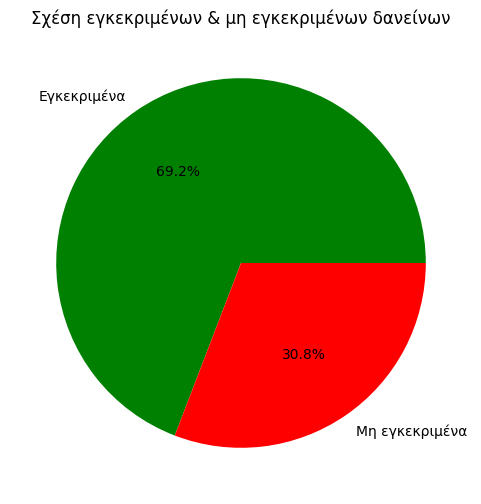

In [14]:
approval_ratio = df['Loan_Status'].value_counts()['Y'] / len(df)

plt.figure(figsize=(6, 6))
plt.pie([approval_ratio, 1 - approval_ratio], labels=['Εγκεκριμένα', 'Μη εγκεκριμένα'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Σχέση εγκεκριμένων & μη εγκεκριμένων δανείνων')
plt.show()


Ποιο είναι το μέσο ατομικό εισόδημα των αιτούντων με εγκεκριμένα δάνεια;

In [15]:
approved_loans = df[df['Loan_Status'] == 'Y']

average_income_approved = approved_loans['ApplicantIncome'].mean()
average_income_approved


5201.093373493976

Ποια είναι η διακύμανση των ποσών των δανείων;

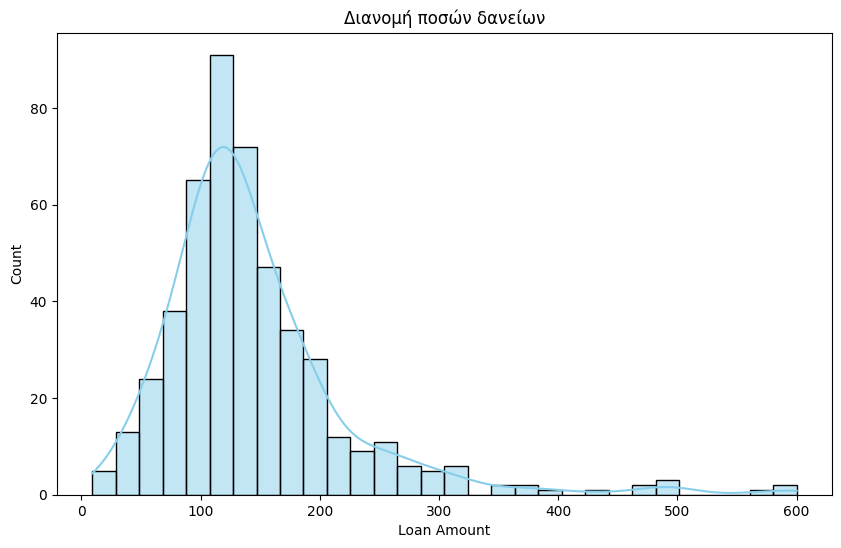

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['LoanAmount'], bins=30, kde=True, color='skyblue')

plt.title('Διανομή ποσών δανείων')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.show()




Που κυμαίνονται τα εισοδήματα των αιτούντων;


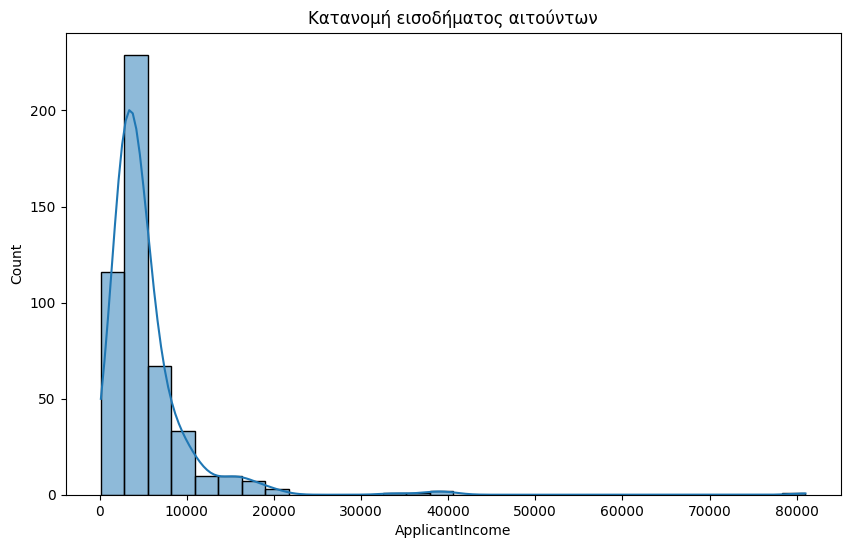

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(x='ApplicantIncome', data=df, bins=30, kde=True)
plt.title('Κατανομή εισοδήματος αιτούντων')
plt.show()

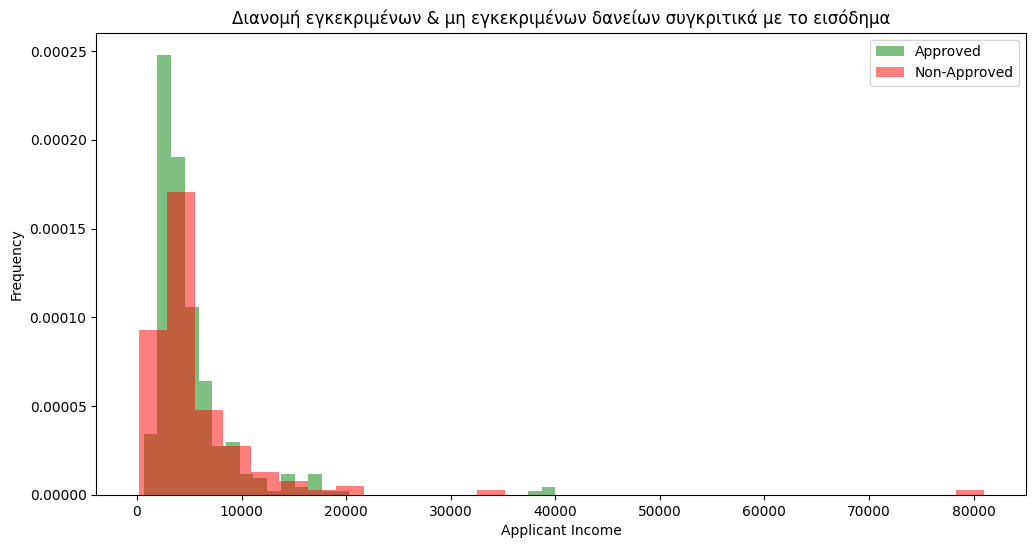

In [18]:
# Διαχωρισμός εγκεκριμένων και μη εγκεκριμένων δανείων
approved_loans = df[df['Loan_Status'] == 'Y']
non_approved_loans = df[df['Loan_Status'] == 'N']

# Δημιουργία histogram
plt.figure(figsize=(12, 6))
plt.hist(approved_loans['ApplicantIncome'], bins=30, color='green', alpha=0.5, label='Approved', density=True)
plt.hist(non_approved_loans['ApplicantIncome'], bins=30, color='red', alpha=0.5, label='Non-Approved', density=True)

plt.title('Διανομή εγκεκριμένων & μη εγκεκριμένων δανείων συγκριτικά με το εισόδημα')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')

plt.legend()
plt.show()


Οικογενειακή κατάσταση των αιτούντων

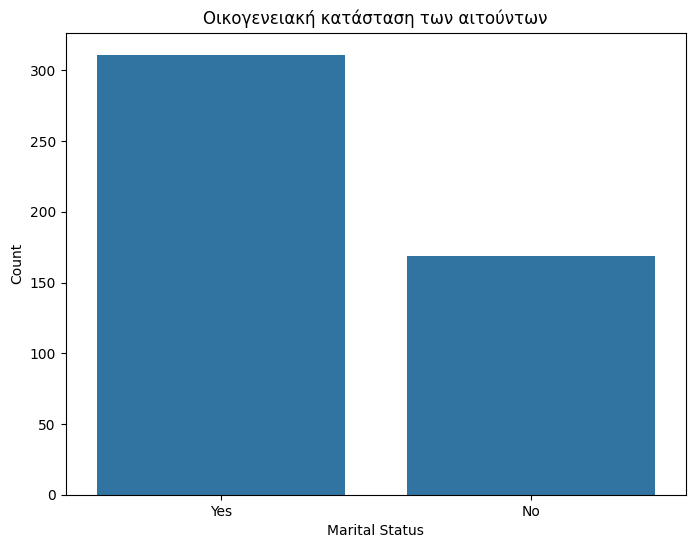

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Married', data=df)
plt.title('Οικογενειακή κατάσταση των αιτούντων')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


Σύγκριση οικογενειακής κατάστασης και κατάστασης δανείου

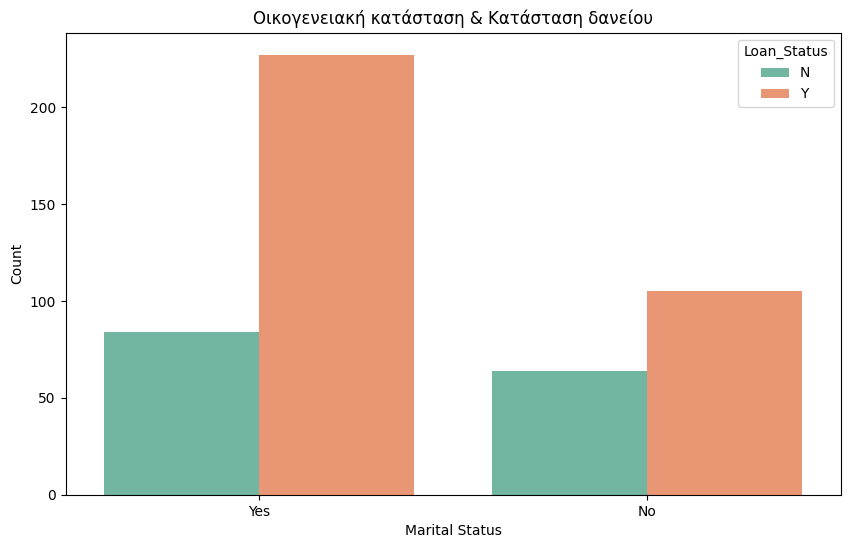

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Married', data=df, hue='Loan_Status', palette='Set2')
plt.title('Οικογενειακή κατάσταση & Κατάσταση δανείου')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


Διανομή περιοχών των ακινήτων δανείου

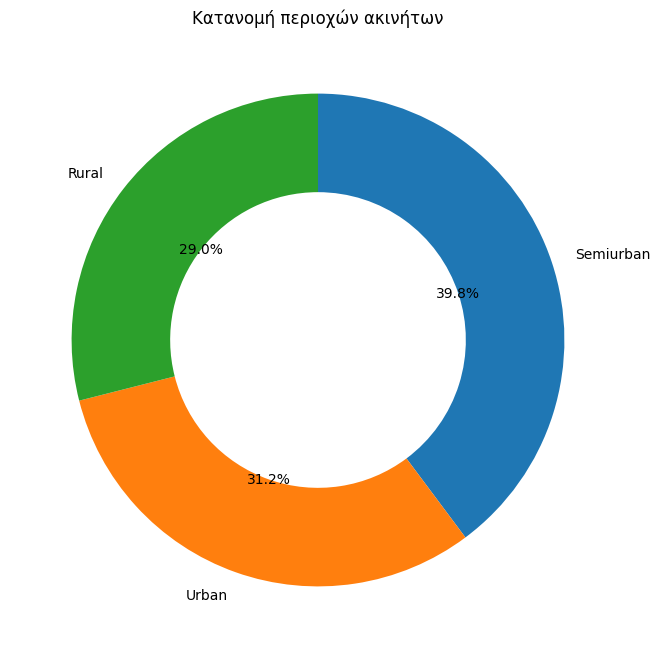

In [21]:
property_area_counts = df['Property_Area'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(property_area_counts, labels=property_area_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False, wedgeprops=dict(width=0.4))
plt.title('Κατανομή περιοχών ακινήτων')
plt.show()


Ποια είναι η πιο συχνή διάρκεια των δανείων;

<ipython-input-22-2e772be6cba5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loan_term_counts.index, y=loan_term_counts.values, palette='viridis')


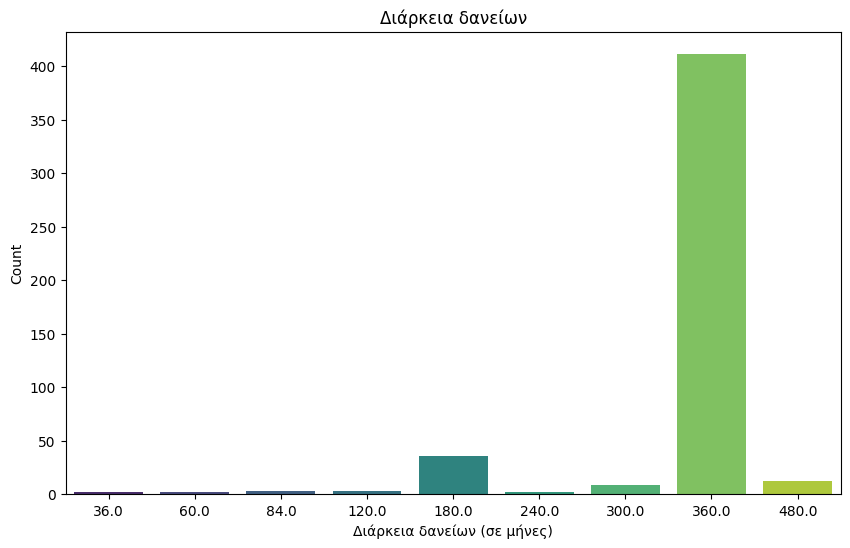

In [22]:
loan_term_counts = df['Loan_Amount_Term'].value_counts()
loan_term_counts = loan_term_counts.sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=loan_term_counts.index, y=loan_term_counts.values, palette='viridis')
plt.title('Διάρκεια δανείων')
plt.xlabel('Διάρκεια δανείων (σε μήνες)')
plt.ylabel('Count')
plt.show()


Πόσοι αιτούντες είναι αυτοαπασχολούμενοι;


<ipython-input-23-c207526337bf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Self_Employed', data=df, palette='Set2')


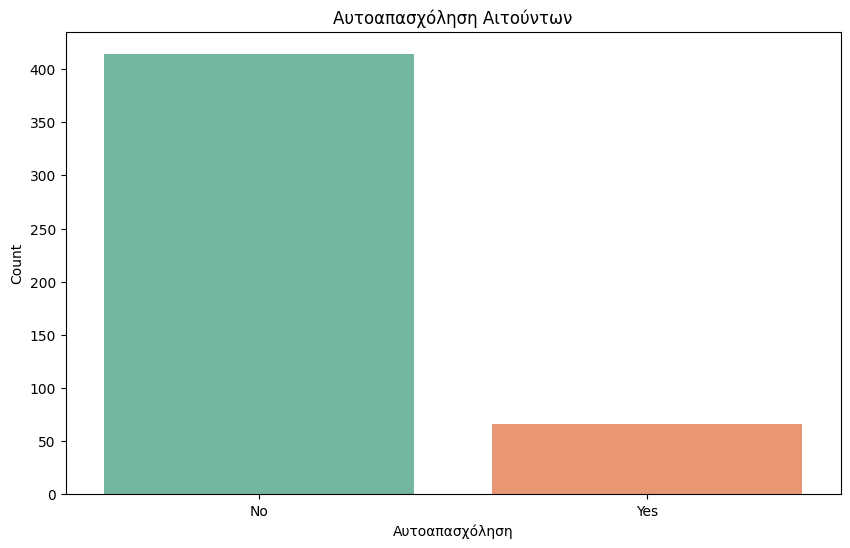

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Self_Employed', data=df, palette='Set2')
plt.title('Αυτοαπασχόληση Αιτούντων')
plt.xlabel('Αυτοαπασχόληση')
plt.ylabel('Count')
plt.show()

Επηρεάζουν την έγκριση δανείων τα εξαρτώμενα μέλη;

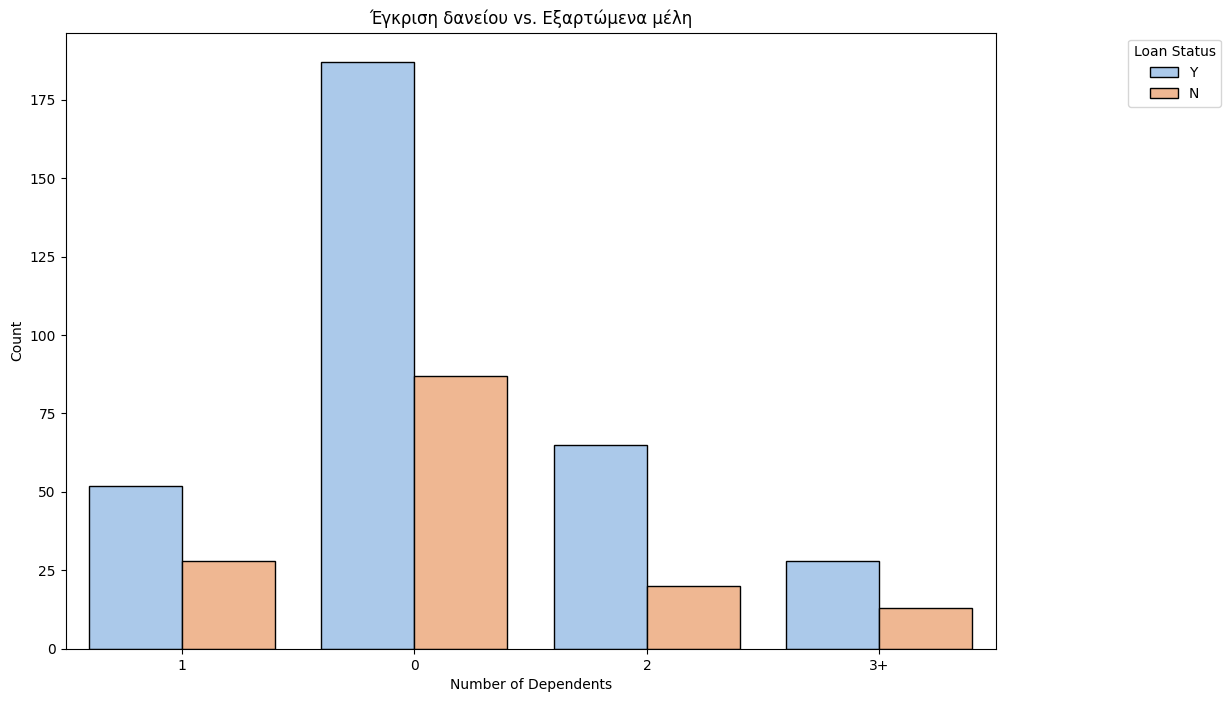

In [24]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Dependents', hue='Loan_Status', data=df, hue_order=['Y', 'N'], palette='pastel', edgecolor="k")
plt.title('Έγκριση δανείου vs. Εξαρτώμενα μέλη')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()


Ας συγκρίνουμε το πιστωτικό ιστορικό με την έγκριση δανείων.

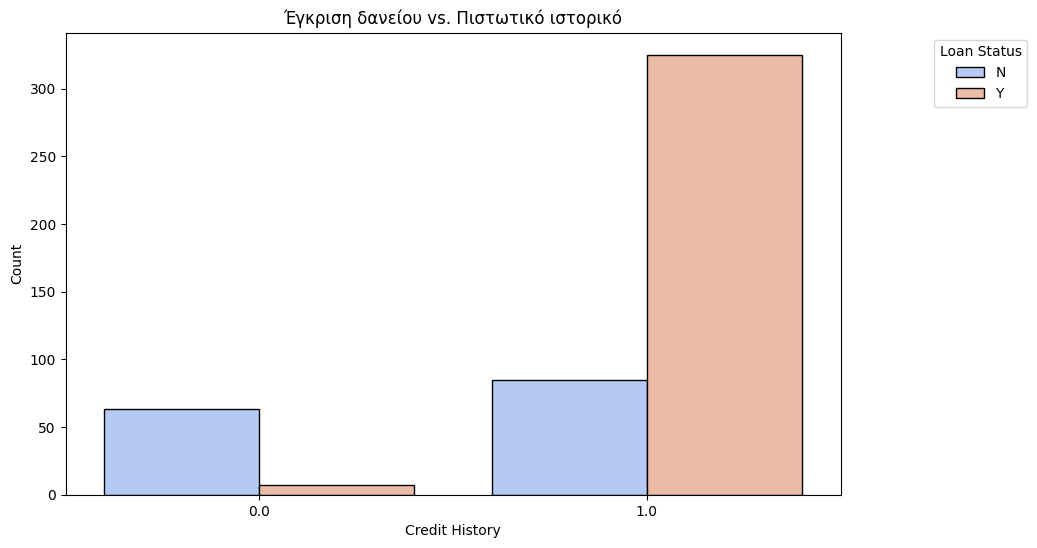

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Credit_History', hue='Loan_Status', data=df, palette='coolwarm', edgecolor="k")
plt.title('Έγκριση δανείου vs. Πιστωτικό ιστορικό')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()


Έγκριση και απόρριψη δανείων ανά περιοχή.

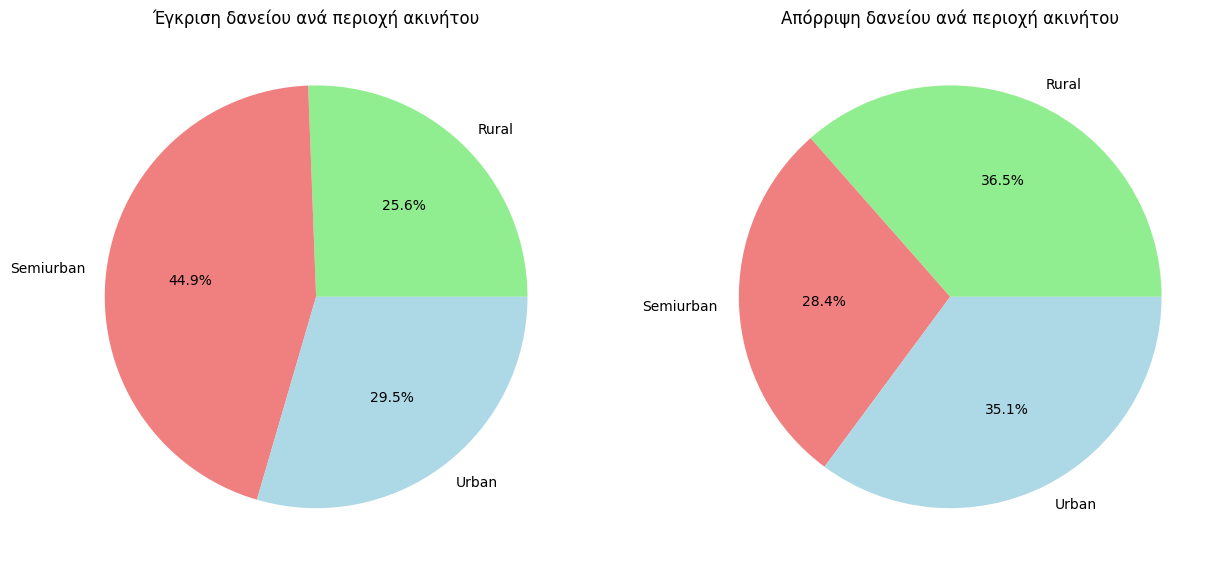

In [26]:
approval_by_property_area = df.pivot_table(index='Property_Area', columns='Loan_Status', aggfunc='size', fill_value=0)
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].pie(approval_by_property_area['Y'], labels=approval_by_property_area.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightblue'])
ax[0].set_title('Έγκριση δανείου ανά περιοχή ακινήτου')
ax[1].pie(approval_by_property_area['N'], labels=approval_by_property_area.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightblue'])
ax[1].set_title('Απόρριψη δανείου ανά περιοχή ακινήτου')

plt.show()


Επηρεάζει το φύλο την έγκριση των δανείων;

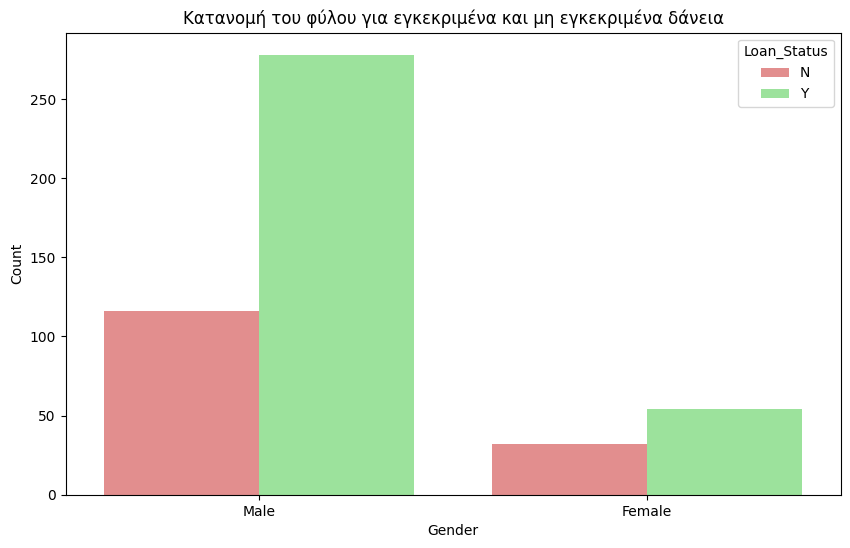

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Loan_Status', data=df, palette={'Y': 'lightgreen', 'N': 'lightcoral'})
plt.title('Κατανομή του φύλου για εγκεκριμένα και μη εγκεκριμένα δάνεια')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()



Θα εξετάσουμε πως επηρεάζουν τις εγκρίσεις δανείων το "Φύλο" και η "Οικογενειακή κατάσταση" των αιτούντων.

1. Θα το διερευνήσουμε αρχικά με την μέθοδο της **Λογιστικής Παλινδρόμησης** (Logistic Regression)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = df[['Gender', 'Married']]
y = df['Loan_Status']

# Μετατρέπουμε τα μη αρηθμιτικά δεδομένα σε αρηθμιτικά
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])
X['Married'] = le.fit_transform(X['Married'])

# Διαχωρίζουμε τα δεδομένα
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Φτιάχνουμε το logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Κάνουμε προβλέψεις
y_pred = logreg_model.predict(X_test)

# Ελέγχουμε την ακρίβεια του μοντέλου
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7083333333333334
Classification Report:
               precision    recall  f1-score   support

           N       0.00      0.00      0.00        28
           Y       0.71      1.00      0.83        68

    accuracy                           0.71        96
   macro avg       0.35      0.50      0.41        96
weighted avg       0.50      0.71      0.59        96



<ipython-input-28-26472f72ae81>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = le.fit_transform(X['Gender'])
<ipython-input-28-26472f72ae81>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Married'] = le.fit_transform(X['Married'])
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
 

Οπτικοιποίηση του μοντέλου

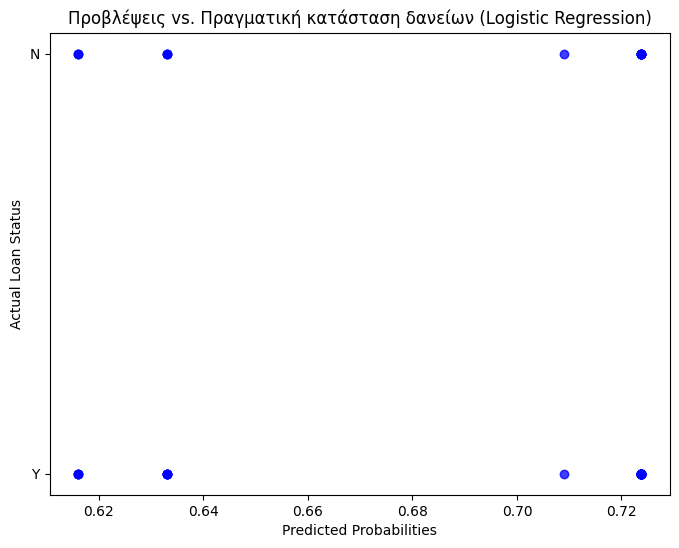

In [29]:
import matplotlib.pyplot as plt

# Καταμέτρηση των προβλέψεων
predicted_probs = logreg_model.predict_proba(X_test)[:, 1]


plt.figure(figsize=(8, 6))
plt.scatter(predicted_probs, y_test, color='blue', alpha=0.5)
plt.xlabel('Predicted Probabilities')
plt.ylabel('Actual Loan Status')
plt.title('Προβλέψεις vs. Πραγματική κατάσταση δανείων (Logistic Regression)')
plt.show()


In [30]:
pip install graphviz


2. Ας πραγματοποιήσουμε ξανά τη διερεύνηση με **Δέντρα Αποφάσεων** (Decision Trees0

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Πρέπει να κωδικοποιήσουμε τις μη αρηθμιτικές μεταβλητές
le = LabelEncoder()
X_train['Gender'] = le.fit_transform(X_train['Gender'])
X_train['Married'] = le.fit_transform(X_train['Married'])

In [32]:
# Τύποι δεδομένων για τις στήλες "Gender" & "Married"
print(X_train.dtypes)


Gender     int64
Married    int64
dtype: object


In [33]:
# Τις κωδικοποιούμε
X_train_encoded = pd.get_dummies(X_train, columns=['Gender', 'Married'])
X_test_encoded = pd.get_dummies(X_test, columns=['Gender', 'Married'])


In [48]:
# Απαιτούμενες βιβλιοθήκες
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Επιλέγουμε τα συγκεκριμένα χαρακτηριστικά
X = df[['Gender', 'Married']]
y = df['Loan_Status']

X = pd.get_dummies(X)

# Διαχωρίζουμε τα δεδομένα σε training και testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred_dt = clf.predict(X_test)

# Ακρίβεια του μοντέλου
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Accuracy: 0.7083333333333334
Classification Report:
               precision    recall  f1-score   support

           N       0.00      0.00      0.00        28
           Y       0.71      1.00      0.83        68

    accuracy                           0.71        96
   macro avg       0.35      0.50      0.41        96
weighted avg       0.50      0.71      0.59        96



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<ipython-input-49-b68ab17a20f7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = le.fit_transform(X['Gender'])
<ipython-input-49-b68ab17a20f7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Married'] = le.fit_transform(X['Married'])


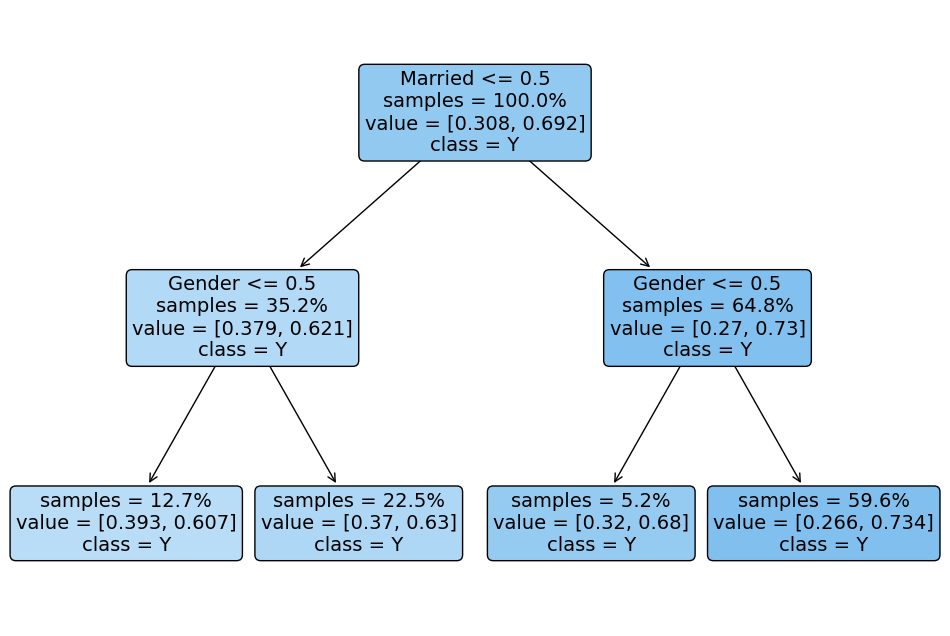

In [49]:
#οπτικοποίηση ενός ενδεικτικού δέντρου απόφασης

X = df[['Gender', 'Married']]
y = df['Loan_Status']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])
X['Married'] = le.fit_transform(X['Married'])

dt_model = DecisionTreeClassifier()
dt_model.fit(X, y)

plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=['Gender', 'Married'], class_names=['N', 'Y'], filled=True, rounded=True, proportion=True, impurity=False)
plt.show()


3. Μέθοδος **Τυχαίου Δάσους** (Random Forest)

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.7083333333333334
Classification Report:
               precision    recall  f1-score   support

           N       0.00      0.00      0.00        28
           Y       0.71      1.00      0.83        68

    accuracy                           0.71        96
   macro avg       0.35      0.50      0.41        96
weighted avg       0.50      0.71      0.59        96



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<ipython-input-50-3c1cdd101a3f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = le.fit_transform(X['Gender'])
<ipython-input-50-3c1cdd101a3f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Married'] = le.fit_transform(X['Married'])


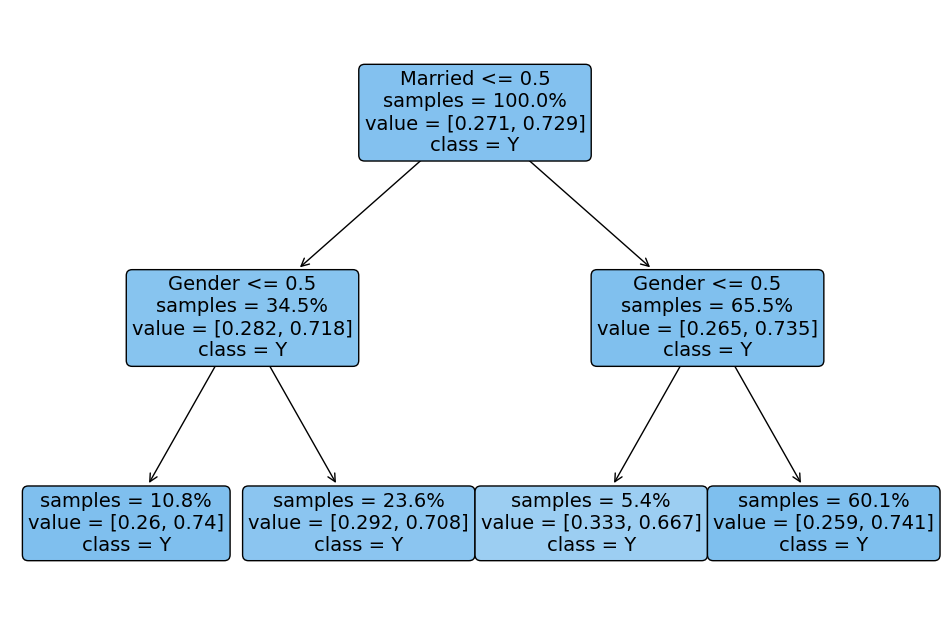

In [50]:
#οπτικοποίηση ενός ενδεικτικού δέντρου από το τυχαίο δάσος
X = df[['Gender', 'Married']]
y = df['Loan_Status']


X['Gender'] = le.fit_transform(X['Gender'])
X['Married'] = le.fit_transform(X['Married'])

rf_model = RandomForestClassifier(n_estimators=10)  # You can adjust the number of estimators
rf_model.fit(X, y)

# οπτικοποίηση ενός δέντρου
plt.figure(figsize=(12, 8))
plot_tree(rf_model.estimators_[0], feature_names=['Gender', 'Married'], class_names=['N', 'Y'], filled=True, rounded=True, proportion=True, impurity=False)
plt.show()


Οπτικοποίηση της σύγκρισης ακρίβειας των μοντέλων

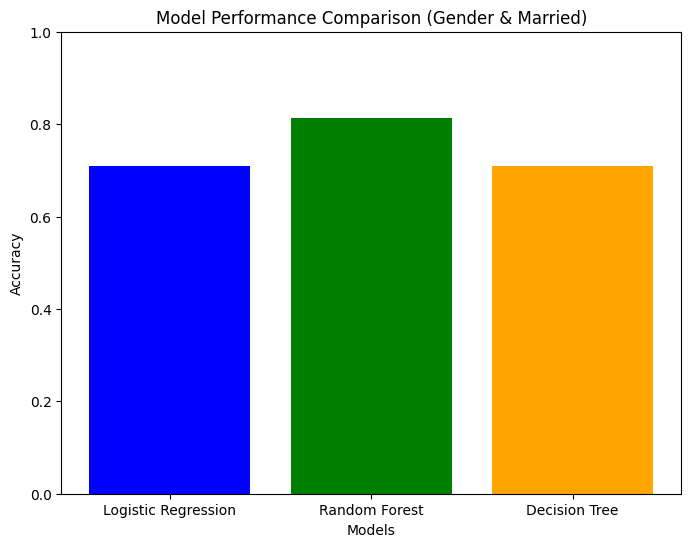

In [51]:
# Accuracy scores
accuracy_scores_gender_married = [accuracy_score(y_test, y_pred),
                                   accuracy_score(y_test, y_pred_rf),
                                   accuracy_score(y_test, y_pred_dt)]

models = ['Logistic Regression', 'Random Forest', 'Decision Tree']

plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores_gender_married, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison (Gender & Married)')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy score
plt.show()


Θα τρέξουμε τα μοντέλα **για όλες τις μεταβλητές** για να συγκρίνουμε τα αποτελέσματα με τα παραπάνω που εμπεριείχαν μόνο τα χαρακτηριστικά "Gender" & "Married"

1. **Logistic Regression**

In [52]:
# αφαιρούμε την την μεταβλητή στόχο
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

categorical_cols = X.select_dtypes(include=['object']).columns

# ΚΑτηγοριοποιούμε τις μη αρηθμιτικές μεταβλητές
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg_model_all_vars = LogisticRegression()
logreg_model_all_vars.fit(X_train, y_train)

y_pred_all_vars = logreg_model_all_vars.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_all_vars))
print("Classification Report:\n", classification_report(y_test, y_pred_all_vars))


Accuracy: 0.8229166666666666
Classification Report:
               precision    recall  f1-score   support

           N       1.00      0.39      0.56        28
           Y       0.80      1.00      0.89        68

    accuracy                           0.82        96
   macro avg       0.90      0.70      0.73        96
weighted avg       0.86      0.82      0.79        96



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


οπτικοποίηση της προβλεπόμενης και της πραγματικής κατάστασης του δανείου με τη χρήση ενός **confusion matrix**.

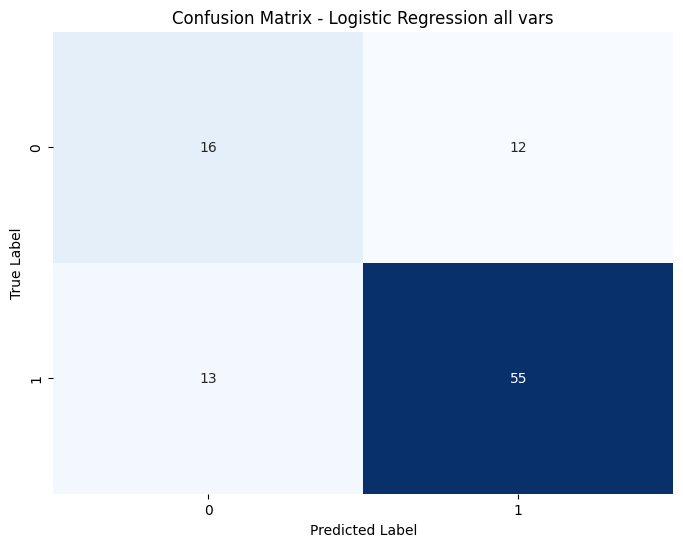

In [57]:
#εισάγουμε τις απαραίτητες βιβλιοθήκες
from sklearn.metrics import confusion_matrix
import seaborn as sns

# υπολογισμός confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_all_vars)

# οπτικοποίηση
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression all vars')
plt.show()


2. **Decision Trees**

In [54]:
# μεταβλητές που λείπουν
df.fillna(method='ffill', inplace=True)

# κατηογρικές μεταβλητές σε αρηθμιτικές
X_encoded = pd.get_dummies(df.drop(columns=['Loan_Status']))

# Μεταβλητή στόχος
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

dt_model_all_vars = DecisionTreeClassifier()
dt_model_all_vars.fit(X_train, y_train)
y_pred_all_vars = dt_model_all_vars.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_all_vars))
print("Classification Report:\n", classification_report(y_test, y_pred_all_vars))


Accuracy: 0.7395833333333334
Classification Report:
               precision    recall  f1-score   support

           N       0.55      0.57      0.56        28
           Y       0.82      0.81      0.81        68

    accuracy                           0.74        96
   macro avg       0.69      0.69      0.69        96
weighted avg       0.74      0.74      0.74        96



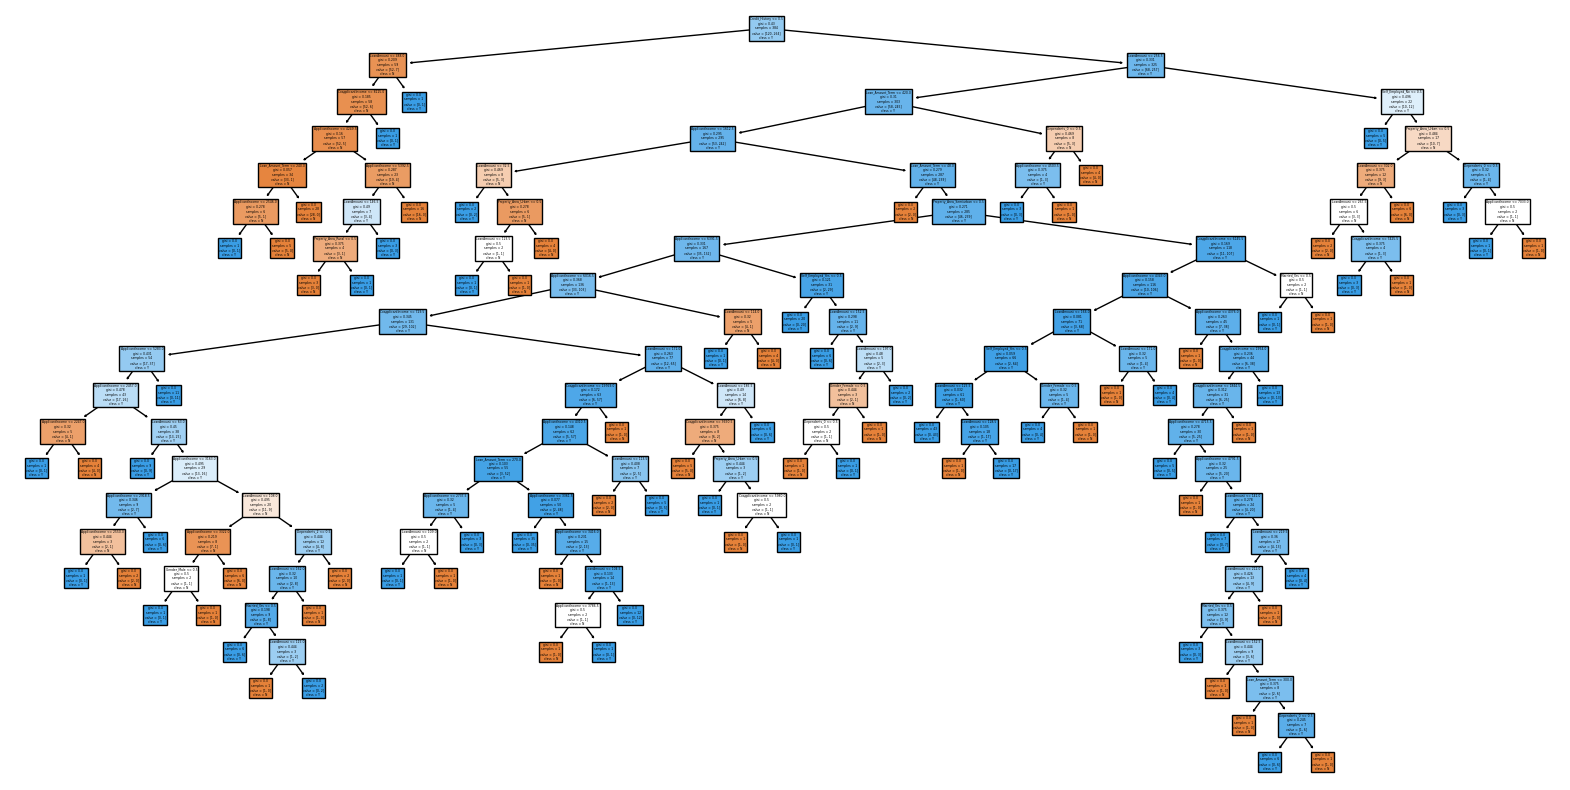

In [44]:
#οπτικοποίηση Decision Trees
plt.figure(figsize=(20,10))
plot_tree(dt_model_all_vars, feature_names=X_encoded.columns, class_names=['N', 'Y'], filled=True)
plt.show()


3. **Random Forest**

In [55]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.8333333333333334
Classification Report:
               precision    recall  f1-score   support

           N       0.88      0.50      0.64        28
           Y       0.82      0.97      0.89        68

    accuracy                           0.83        96
   macro avg       0.85      0.74      0.76        96
weighted avg       0.84      0.83      0.82        96



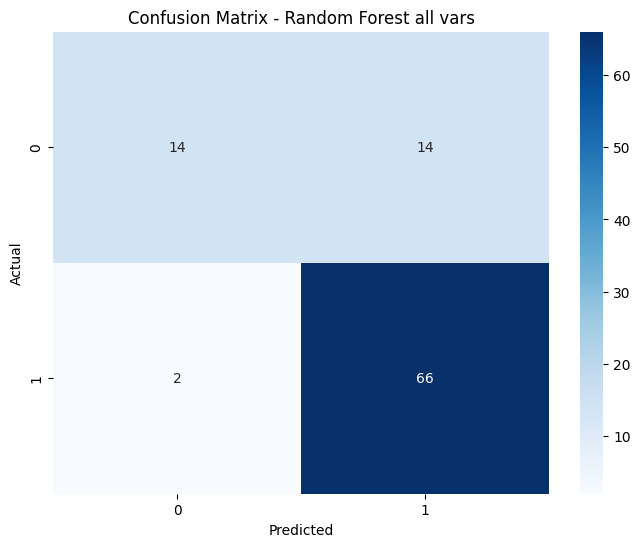

In [58]:
#οπτικοποίηση
conf_matrix = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest all vars")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Σύγκριση απόδοσης των μοντέλων**

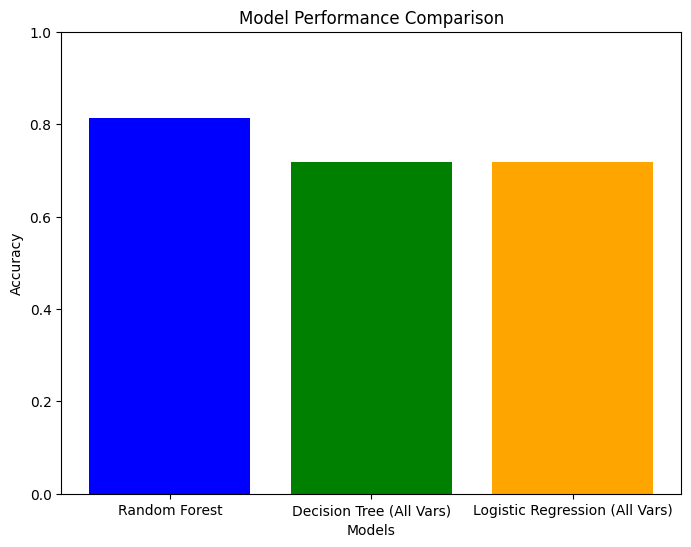

In [47]:

accuracy_scores = [accuracy_score(y_test, y_pred_rf),
                   accuracy_score(y_test, y_pred_all_vars),
                   accuracy_score(y_test, y_pred_all_vars)]

models = ['Random Forest', 'Decision Tree (All Vars)', 'Logistic Regression (All Vars)']

plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.show()


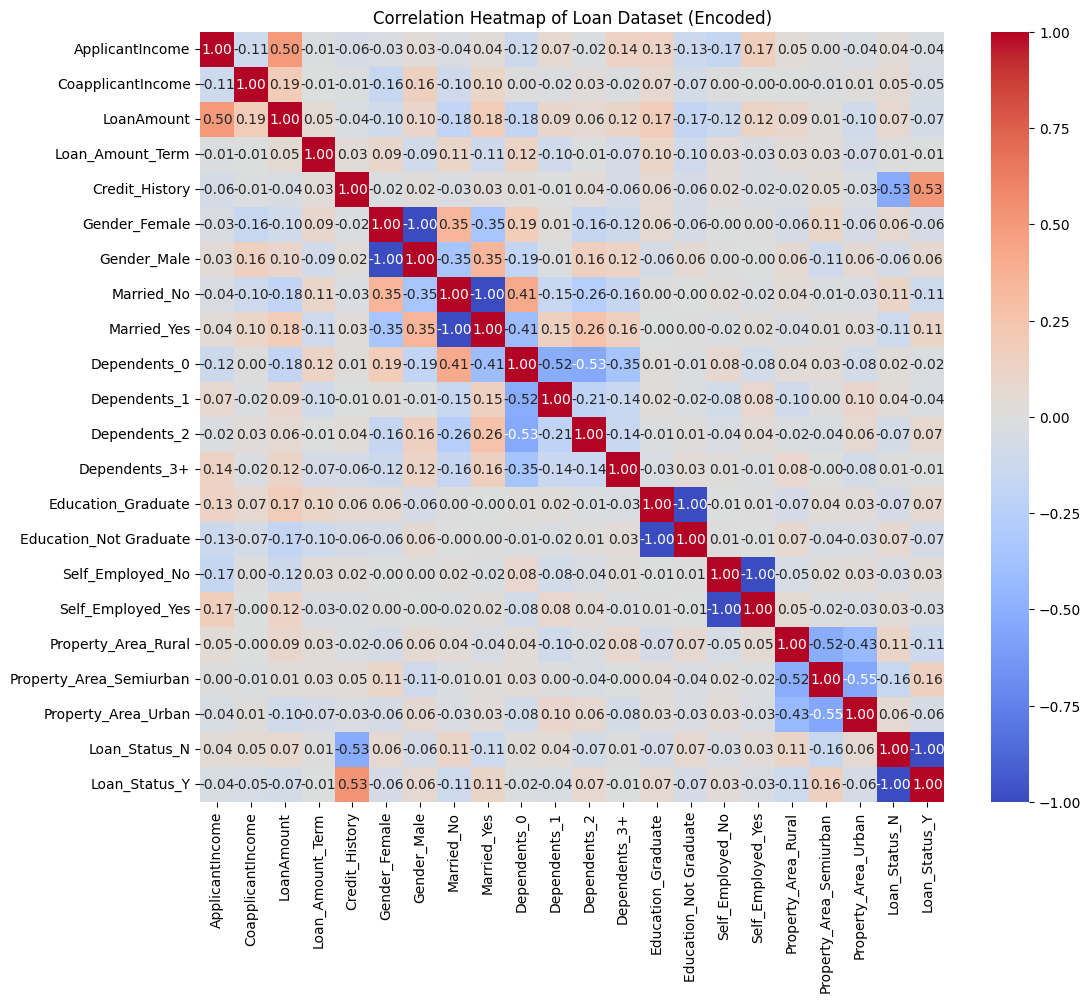

In [61]:
#correlation matrix
df_encoded = pd.get_dummies(df)

correlation_matrix = df_encoded.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of dataset)')
plt.show()
